In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
%matplotlib inline

In [7]:
boston = load_boston()

In [8]:
raw_feature = boston.data
raw_label = boston.target

In [11]:
raw_feature.shape

(506, 13)

In [18]:
df = pd.DataFrame(raw_feature,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


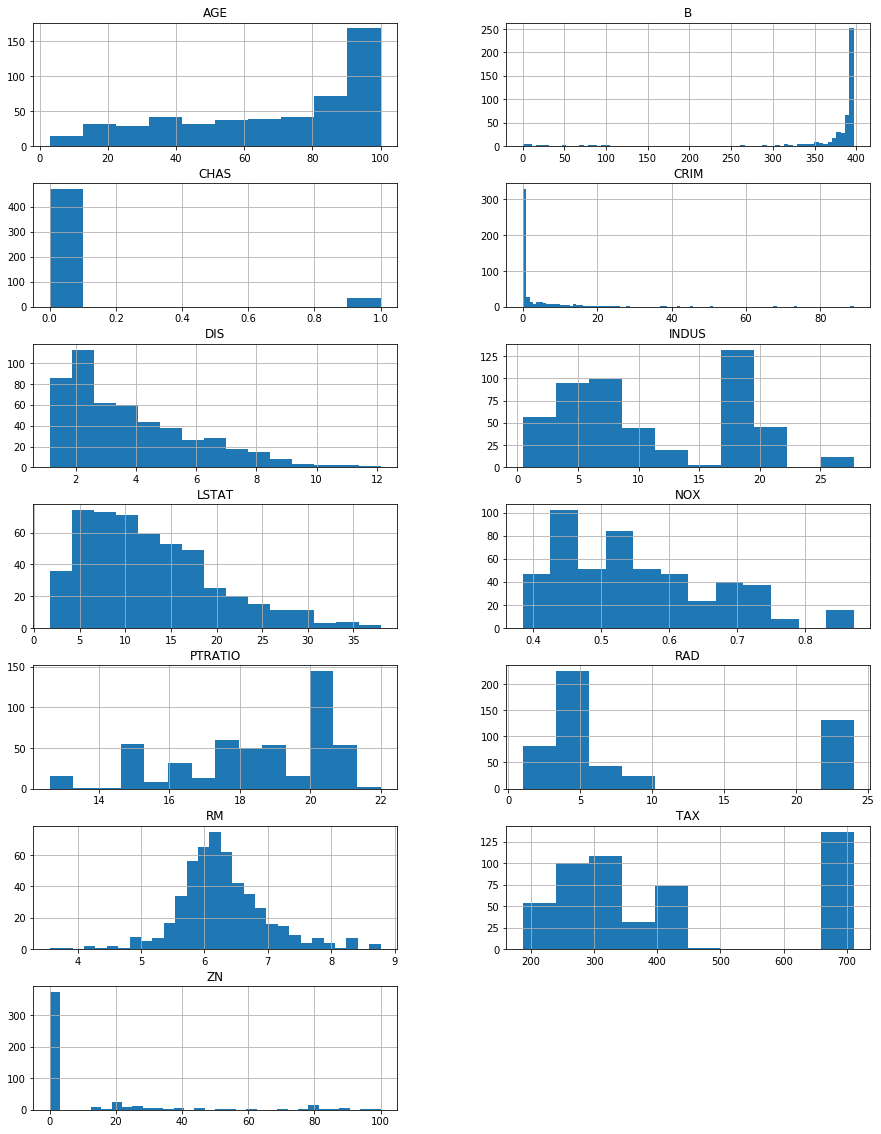

In [23]:
df.hist(bins='auto',figsize=(15,20),layout=(7,2))
plt.show()

# First we try to pridict output without preprocessing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(raw_feature,raw_label)

In [55]:
regres = GradientBoostingRegressor()

In [56]:
regres.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

`staged_predicted()` measure the validation error at each stage of training to find the optimal trees

In [57]:
regres.score(x_test,y_test)

0.814131731395626

In [61]:
errors = [mean_squared_error(y_test,y_pred) for y_pred in regres.staged_predict(x_test)]

In [63]:
no_estimator = np.argmin(errors)

In [62]:
regres.score(x_test,y_test)

0.814131731395626

Now, we can build and fit our model using the optimal number of trees

In [65]:
best_regres1 = GradientBoostingRegressor(n_estimators=no_estimator)

In [66]:
best_regres1.fit(x_train,y_train)
best_regres1.score(x_test,y_test)

0.815922830770597

In [69]:
y_pred = best_regres1.predict(x_test)
r2_score(y_test,y_pred)

0.815922830770597

In [70]:
mean_squared_error(y_test,y_pred)

14.072528281350023

In [71]:
mean_absolute_error(y_test,y_pred)

2.445519414779653

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
params = {'learning_rate' : [0.1,0.5,0.9,1],
         'max_depth' : [4,8,10,12],
         'n_estimators' : [10,20,30,40],}

In [93]:
reg    = GradientBoostingRegressor()
rs = GridSearchCV(reg,param_grid=params)

In [94]:
rs.fit(x_train,y_train)

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\GirrajJangid\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [95]:
rs.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40}

In [96]:
rs.score(x_test,y_test)

0.8026672684303692